# SD701 - Big Data Mining

# Subject : Cover Type Prediction of Forests

In this competition you are asked to predict the forest cover type 
(the predominant kind of tree cover) from strictly cartographic variables 
(as opposed to remotely sensed data). The actual forest cover type for
a given 30 x 30 meter cell was determined from US Forest Service (USFS)
Region 2 Resource Information System data. Independent variables were 
then derived from data obtained from the US Geological Survey and USFS. 
The data is in raw form (not scaled) and contains binary columns of data 
for qualitative independent variables such as wilderness areas and soil type.

Predicting forest cover type from cartographic variables only
(no remotely sensed data). The actual forest cover type for
a given observation (30 x 30 meter cell) was determined from
US Forest Service (USFS) Region 2 Resource Information System 
(RIS) data. Independent variables were derived from data
originally obtained from US Geological Survey (USGS) and
USFS data. Data is in raw form (not scaled) and contains
binary (0 or 1) columns of data for qualitative independent
variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the
Roosevelt National Forest of northern Colorado. These areas
represent forests with minimal human-caused disturbances,
so that existing forest cover types are more a result of 
ecological processes rather than forest management practices.

Some background information for these four wilderness areas: 
Neota (area 2) probably has the highest mean elevational value of 
the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) 
would have a lower mean elevational value, while Cache la Poudre 
(area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have 
spruce/fir (type 1), while Rawah and Comanche Peak would probably
have lodgepole pine (type 2) as their primary species, followed by 
spruce/fir and aspen (type 5). Cache la Poudre would tend to have 
Ponderosa pine (type 3), Douglas-fir (type 6), and 
cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of 
the overall dataset than either the Neota or Cache la Poudre, due 
to their assortment of tree species and range of predictive 
variable values (elevation, etc.) Cache la Poudre would probably 
be more unique than the others, due to its relatively low 
elevation range and species composition.


**Features information**:

Given is the attribute name, attribute type, the measurement unit and
a brief description. The forest cover type is the classification 
problem. The order of this listing corresponds to the order of 
numerals along the rows of the database.

Name / Data Type / Measurement Description:
- **Elevation** / quantitative / meters Elevation in meters
- **Aspect** / quantitative / azimuth Aspect in degrees azimuth
- **Slope** / quantitative / degrees Slope in degrees
- **Horizontal_Distance_To_Hydrology** / quantitative / meters Horz Dist to nearest surface water features
- **Vertical_Distance_To_Hydrology** / quantitative / meters Vert Dist to nearest surface water features
- **Horizontal_Distance_To_Roadways** / quantitative / meters Horz Dist to nearest roadway
- **Hillshade_9am** quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
- **Hillshade_Noon** quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
- **Hillshade_3pm** quantitative / 0 to 255 index /  Hillshade index at 3pm, summer solstice
- **Horizontal_Distance_To_Fire_Points** / quantitative / meters Horz Dist to nearest wildfire ignition points
- **Wilderness_Area** (4 binary columns) / qualitative 0 (absence) or 1 (presence) / Wilderness area designation
- **Soil_Type** (40 binary columns) / qualitative 0 (absence) or 1 (presence) / Soil Type designation
- **Cover_Type** (7 types) / integer 1 to 7 / Forest Cover Type designation

## A - Libraries

I decided to work on Python environment and use the following libraries:

- **Pandas** for data manipulation and ingestion

- **Matplotlib** and **seaborn** for data visualization

- **Numpy** for multidimensional array computing

- **sklearn** for machine learning and predictive modeling

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt

import numpy as np

import seaborn as sn

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

import pylab as plot

## B - Data Exploration

### 1) Import Data
- **train-set.csv** : the training set
- **test-set.csv** : the test set

In [2]:
# Train data
train_data = pd.read_csv('train_set.csv', header=0).set_index('Id')

# Test data
test_data = pd.read_csv('test_set.csv', header=0).set_index('Id')

# Get Column names
col_names = train_data.columns.tolist()

# Get Features names
features_names = col_names[:-1]

# Get label names
label_names = col_names[-1]

### 2) Data Analysis

It's always a good idea to look at distribution of our data because visualization makes outliers and errors immediately stand out.

#### a. Statistical description 

In [3]:
train_data.describe().round()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0,528720.0
mean,2960.0,156.0,14.0,270.0,46.0,2353.0,212.0,223.0,143.0,1979.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
std,280.0,112.0,8.0,213.0,58.0,1564.0,27.0,20.0,38.0,1326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
min,1759.0,-72.0,-3.0,-144.0,-182.0,-805.0,-2.0,0.0,-17.0,-704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,2809.0,58.0,9.0,108.0,7.0,1106.0,198.0,213.0,119.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,2996.0,127.0,13.0,223.0,30.0,2001.0,218.0,226.0,143.0,1710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
75%,3163.0,260.0,18.0,387.0,69.0,3333.0,231.0,237.0,168.0,2550.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
max,3957.0,440.0,65.0,1397.0,601.0,7577.0,268.0,266.0,259.0,7548.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0


All data are numerical and it seems there is no missing values in the dataFrame.
To be sure we search if there is any nulls.

In [4]:
train_data[train_data.isnull().any(axis=1)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Now we are sure there are no rows with null values, we can examine the data through a series of visualizations.

#### b. correlation matrix

Text(0.5,1,'Correlation Matrix of the Dataset')

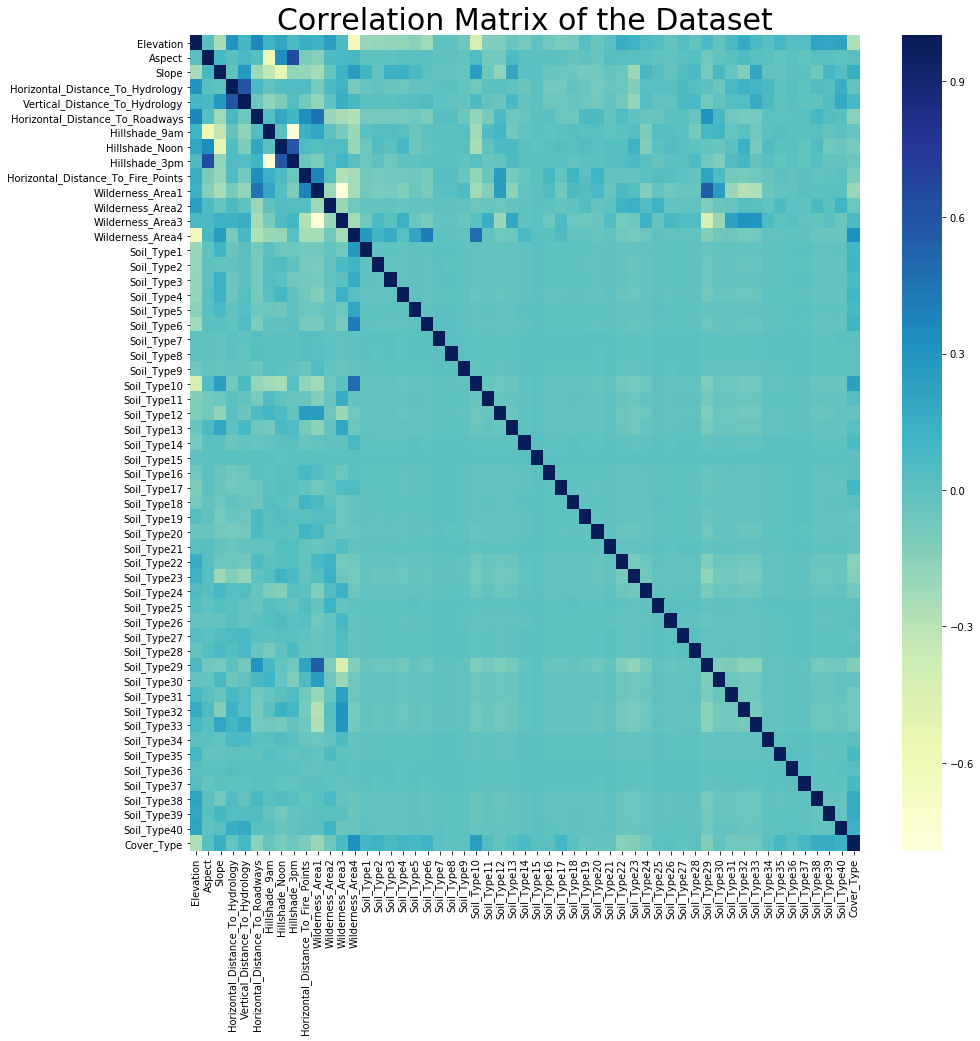

In [5]:
fig= plt.figure(figsize=(15, 15))
sn.heatmap(train_data.corr(), cmap="YlGnBu")
plt.title('Correlation Matrix of the Dataset', fontsize=30)





We can focus the correlation matrix on non Dummy variable

Text(0.5,1,'Correlation Matrix of the Dataset (Non Dummy variable)')

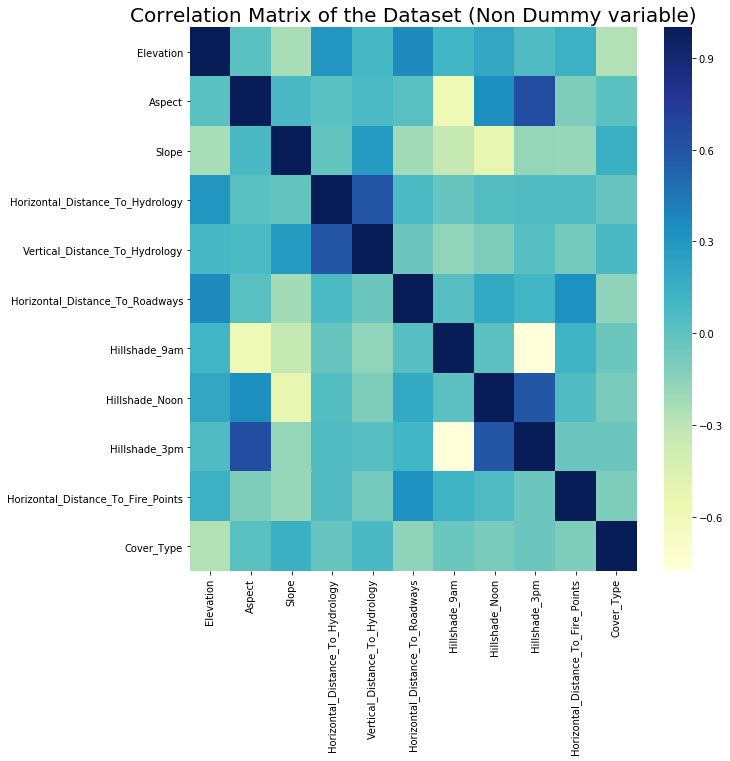

In [6]:
fig = plt.figure(figsize=(10, 10))
sn.heatmap(train_data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points', 'Cover_Type']].corr(), cmap="YlGnBu")
plt.title('Correlation Matrix of the Dataset (Non Dummy variable)', fontsize=20)

#### c. histogram

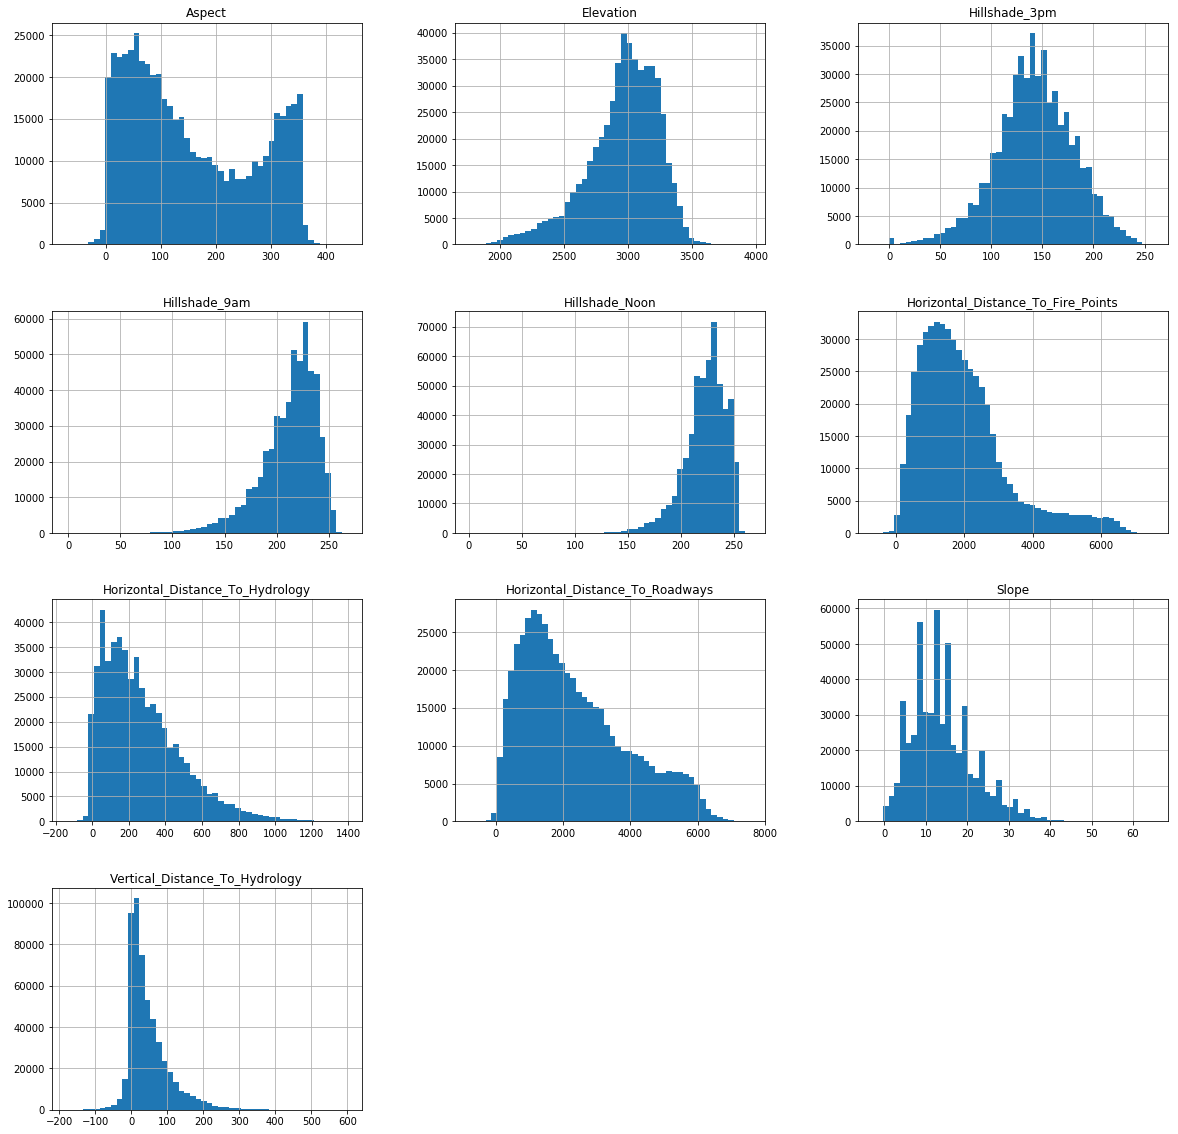

In [7]:
train_data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']].hist(figsize=(20,20), bins=50)
plt.show()

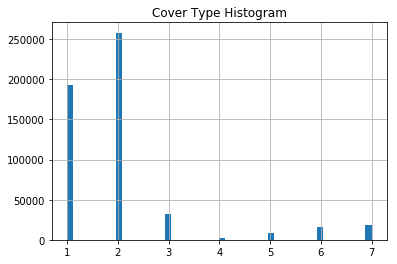

In [8]:
train_data['Cover_Type'].hist(bins=50)
plt.title('Cover Type Histogram')
plt.show()

We can now take a look at scatterplot matrix. This matrix gives us the distribution of each features along the diagonal and plot a scatterplot for each variable combination.

#### d. Scatterplot

<Figure size 1080x1080 with 0 Axes>

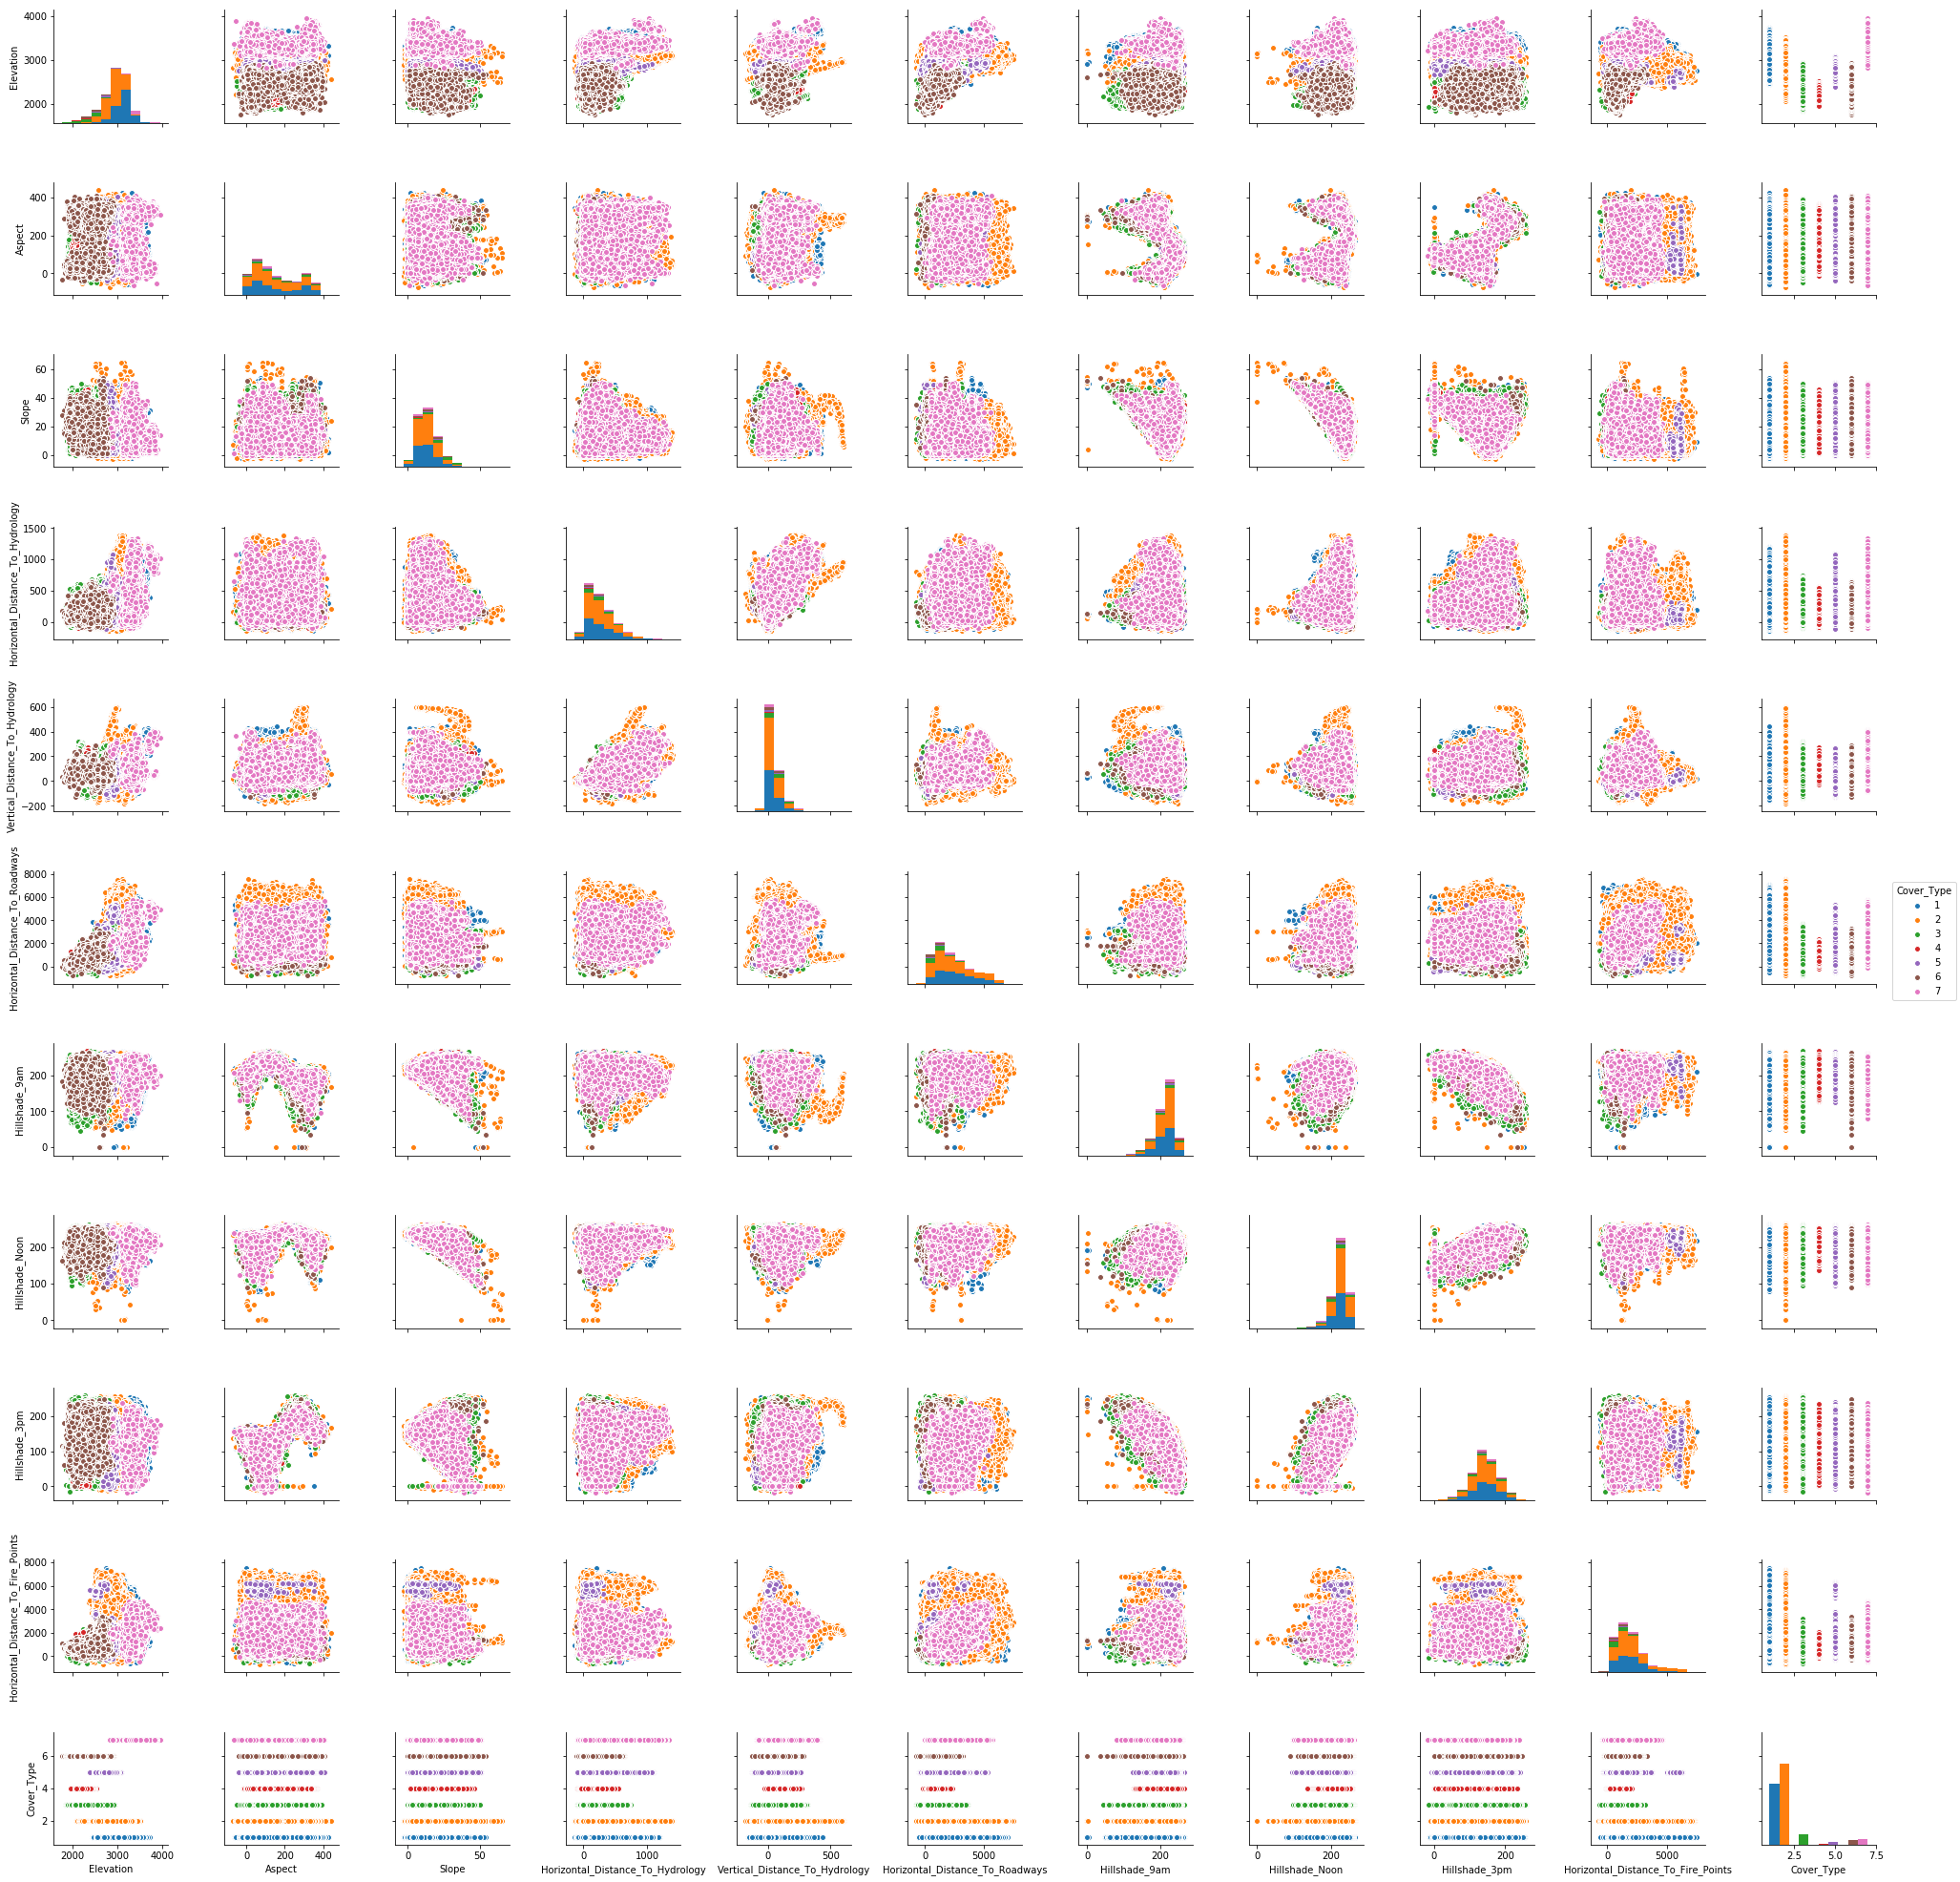

In [10]:
fig= plt.figure(figsize=(15, 15))
sn.pairplot(train_data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points', 'Cover_Type']], hue="Cover_Type")

### 3) Features Engineering

In this section we build new features using linear combination of data in order to improve the accuracy of the models we will implement in next sexion.

#### a. Hillshade mean
Mean hillshade of the hillshade at 9AM, 12AM, and 3PM

In [11]:
# Add Hillshade_mean to features name list
features_names.append('Hillshade_mean')

# Build Hillshape mean for train data
train_data['Hillshade_mean'] = train_data[['Hillshade_9am','Hillshade_Noon','Hillshade_3pm']].mean(axis=1)

# Build Hillshape mean for test data
test_data['Hillshade_mean'] = test_data[['Hillshade_9am','Hillshade_Noon','Hillshade_3pm']].mean(axis=1)

#### b. Distance to hydrology
Square root of the sum of the squared horizontal & vertical distances to water

In [12]:
# Add Distance_To_Hydrology to features name list
features_names.append('Distance_To_Hydrology')

# Build Distance_To_Hydrology mean for train data
train_data['Distance_To_Hydrology'] = np.sqrt(train_data['Horizontal_Distance_To_Hydrology'] ** 2 + train_data['Vertical_Distance_To_Hydrology'] ** 2) 

# Build Distance_To_Hydrology mean for test data
test_data['Distance_To_Hydrology'] = np.sqrt(test_data['Horizontal_Distance_To_Hydrology'] ** 2 + test_data['Vertical_Distance_To_Hydrology'] ** 2) 

#### c. Mean Distance to Amenities
Mean distance to amenities like Water, Fire and Roadways

In [13]:
# Add Distance_To_Amenities to features name list
features_names.append('Distance_To_Amenities')

# Build Distance_To_Amenities mean for train data
train_data['Distance_To_Amenities'] = train_data[['Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']].mean(axis=1)

# Build Distance_To_Amenities mean for test data
test_data['Distance_To_Amenities'] = test_data[['Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']].mean(axis=1)

#### d. Cosinus slope
The cosine of the slope, used to partially model the relationships between hillshade

In [14]:
# Add Cosinus_Slope to features name list
features_names.append('Cosinus_Slope')

# Build Cosinus_Slope mean for train data
train_data['Cosinus_Slope'] = np.cos(train_data['Slope'])

# Build Cosinus_Slope mean for test data
test_data['Cosinus_Slope'] = np.cos(test_data['Slope'])

#### e. Logarithme Elevation

In [15]:
# Add Log_Elevation to features name list
features_names.append('Log_Elevation')

# Build Log_Elevation mean for train data
train_data['Log_Elevation'] = np.log(train_data['Elevation'])

# Build Log_Elevation mean for test data
test_data['Log_Elevation'] = np.log(test_data['Elevation'])

#### f. Sum of Hillshade squared

In [16]:
# Add Squared_Hillshade to features name list
features_names.append('Squared_Hillshade')

# Build Squared_Hillshade mean for train data
train_data['Squared_Hillshade'] = np.sqrt(train_data['Hillshade_3pm'] + train_data['Hillshade_Noon'] + train_data['Hillshade_9am'])

# Build Squared_Hillshade mean for test data
test_data['Squared_Hillshade'] = np.sqrt(test_data['Hillshade_3pm'] + test_data['Hillshade_Noon'] + test_data['Hillshade_9am'])

## C - Machine Learning

We can now proceed to train multiple classifiers on our dataset and run model comparisons. 

### 1) Train and test set
Firstly we split the train dataset into training and test sets. We will use the test dataset only when we will be ready to make prediction.

In [17]:
# Build features train & test set
X_train, X_test, y_train, y_test = train_test_split(train_data[features_names], train_data[label_names], test_size=0.2, random_state=42)

### 2) Random Forest Classifier
Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time.
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
It also provides a pretty good indicator of the importance it assigns to your features.

####  a. Cross validation and hyperparameter tuning
We can now fit an RandomForest classifier to our dataset and hypertune parameters using cross-validation.
The most critical parameters for a Random Forest are:
- **number of estimators** : number of trees the algorithm builds before taking the maximum voting or taking averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.
- **max features** : maximum number of features Random Forest is allowed to try in an individual tree.
- **max depth** : how deep we want to grow the trees


In [ ]:
# Build Parameter Grid
parameter_grid = {'max_depth': [400, 450, 500], 'n_estimators': [200, 300], 'max_features':[None, 'auto', 'sqrt']}

# Random Forest Classifier
rfc = RandomForestClassifier(n_jobs=2, verbose=1)

# K-Folds for cross-validation
k_fold = StratifiedKFold(n_splits=5)

# Grid Search Cross Validation
grid_search = GridSearchCV(rfc, scoring='accuracy', param_grid=parameter_grid, cv=k_fold, verbose=1)

# Fit model
model = grid_search.fit(X_train, y_train)

# Result
print('Best parameters from Cross Validation: {}'.format(grid_search.best_params_))
print('Score on test set : {}'.format(grid_search.score(X_test, y_test)))

#### b. Previsions with best model

In [18]:
# Random Forest Classifier with best param
rfc_opt = RandomForestClassifier(max_depth=450, n_estimators=300, max_features= len(features_names)-1 , warm_start=True, verbose=1)

# Fit model
model_opt = rfc_opt.fit(train_data[features_names], train_data[label_names])

# Predict
Y_pred = model_opt.predict(test_data[features_names])

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 57.1min finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   25.7s finished


#### c. Features importance 

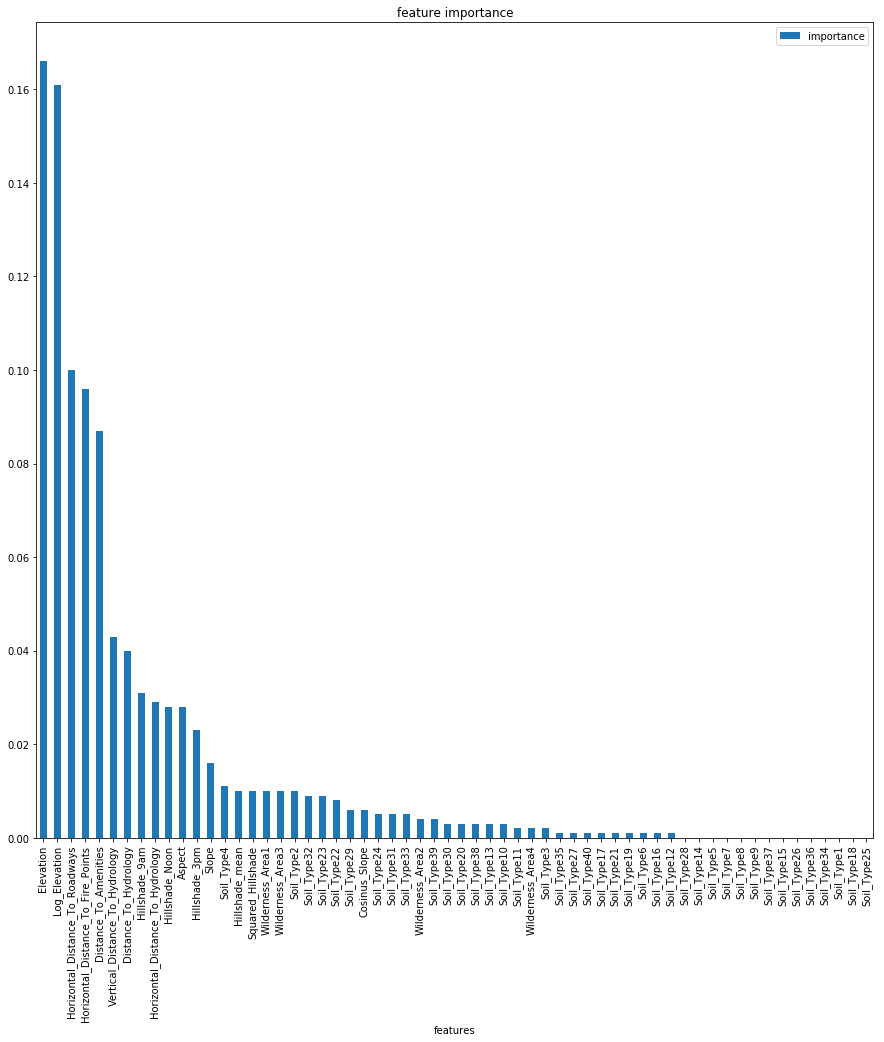

In [19]:
importances = pd.DataFrame({'features':features_names,'importance':np.round(model_opt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('features')
importances.plot.bar(figsize=(15, 15))
plt.title("feature importance")
plt.show()

#### d. Export prevision

In [20]:
df_result = pd.DataFrame()
df_result['Id'] = test_data[features_names].index.values
df_result['Cover_Type'] = Y_pred
df_result.to_csv('result.csv', index=False)

The previous model gives us a score **94,86%** of on Kaggle. We will try to improve this score in next sexion.

### 3) ExtraTrees Classifier
An “extra trees” classifier, otherwise known as an “Extremely randomized trees” classifier, is a variant of a random forest. Unlike a random forest, at each step the entire sample is used and decision boundaries are picked at random, rather than the best one. In real world cases, performance is comparable to an ordinary random forest, sometimes a bit better.

#### a. Cross validation and hyperparameter tuning
In this section we try to improve our score fiting an ExtraTrees Classifier to our dataset and hypertune parameters using cross-validation. The most critical parameters for a ExtraTree are :
- **max depth** : how deep we want to grow the trees
- **number of estimators** : number of trees
- **max features** : size of the random subsets of features to consider when splitting a node.

In [ ]:
# Build Parameter Grid
parameter_grid = {'max_depth': [400, 430, 450], 'n_estimators': [300, 350, 400], 'max_features':['sqrt', 'log2', len(features_names)-1]}

# Extra Tree Classifier
rfc = ExtraTreesClassifier(n_jobs=2, verbose=1)

# K-Folds for cross-validation
k_fold = StratifiedKFold(n_splits=5)

# Grid Search Cross Validation
grid_search = GridSearchCV(rfc, scoring='accuracy', param_grid=parameter_grid, cv=k_fold, verbose=1)

# Fit model
model = grid_search.fit(X_train, y_train)

# Result
print('Best parameters from Cross Validation: {}'.format(grid_search.best_params_))
print('Score on test set : {}'.format(grid_search.score(X_test, y_test)))

#### b. Previsions with best model

In [21]:
# Extra Trees Classifier with best param
rfc_opt = ExtraTreesClassifier(max_depth=430, n_estimators=350, max_features= len(features_names) - 1 , warm_start=True, verbose=1, n_jobs=3)

# Fit model
model_opt = rfc_opt.fit(train_data[features_names], train_data[label_names])

# Predict
Y_pred = model_opt.predict(test_data[features_names])

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 11.5min
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed: 19.8min finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   11.3s
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed:   21.4s finished


#### c. Features importance 

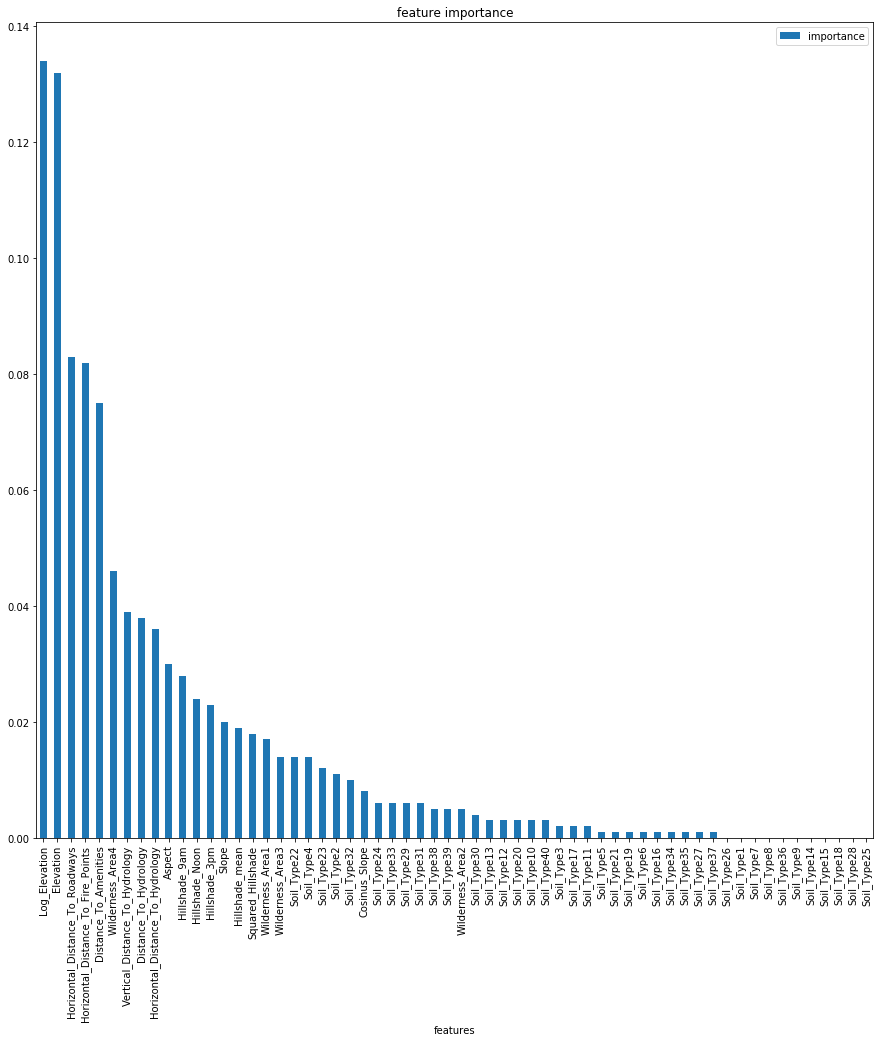

In [22]:
importances = pd.DataFrame({'features':features_names,'importance':np.round(model_opt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('features')
importances.plot.bar(figsize=(15, 15))
plt.title("feature importance")
plt.show()

#### d. Export prevision

In [23]:
df_result = pd.DataFrame()
df_result['Id'] = test_data[features_names].index.values
df_result['Cover_Type'] = Y_pred
df_result.to_csv('result.csv', index=False)

The previous model gives us a score **95.878%** of on Kaggle.